In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
df=pd.read_csv('laptop_data.csv')
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [97]:

print('numpy',np.__version__)
print('pandas',pd.__version__)
import sklearn
print('sklearn', sklearn.__version__)


numpy 1.26.4
pandas 2.2.3
sklearn 1.6.1


In [98]:
df.shape

(1303, 12)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [100]:
df.duplicated().sum()

0

<Axes: xlabel='Company'>

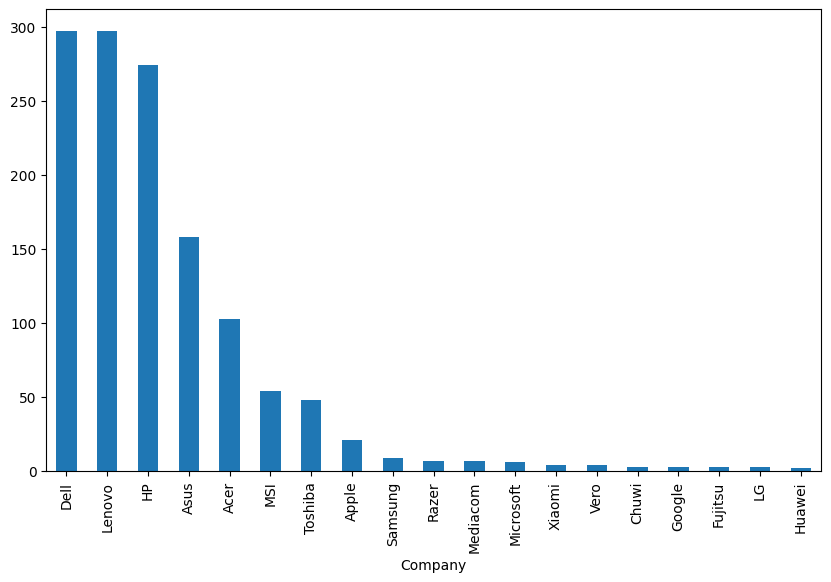

In [101]:
plt.figure(figsize=(10,6))
df['Company'].value_counts().plot(kind='bar')

<Axes: xlabel='TypeName'>

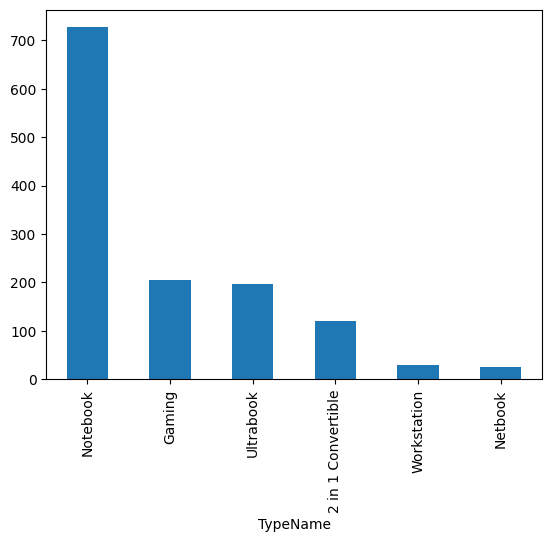

In [102]:
df['TypeName'].value_counts().plot(kind='bar')

<Axes: xlabel='OpSys'>

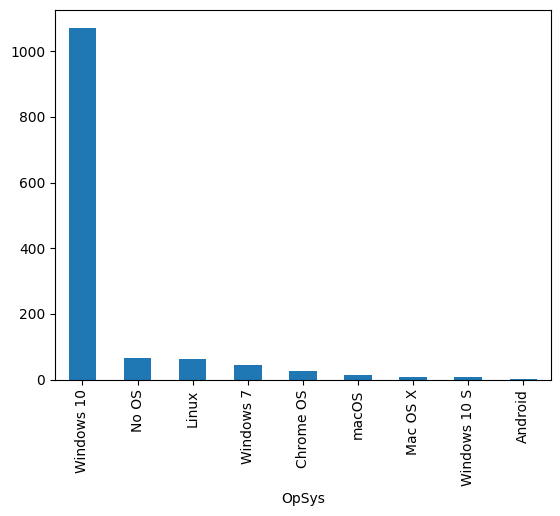

In [103]:
df['OpSys'].value_counts().plot(kind='bar')

In [104]:
def func(x):
    a=x.split(' ')
    return a[-1]

In [105]:
df['HD']=df['ScreenResolution'].apply(func)

In [106]:
df.sample()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,HD
417,417,HP,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.43kg,79920.0,1920x1080


In [107]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [108]:
df['Ram']=df['Ram'].str.extract('(\d+)')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\nehas\AppData\Local\Temp\ipykernel_13524\3990089777.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['Ram']=df['Ram'].str.extract('(\d+)')


In [109]:
df['Ram']=df['Ram'].astype('int32')

In [110]:
df['Weight']=df['Weight'].str.replace('kg',' ')

In [111]:
df['weight']=df['Weight'].astype('float64')

In [112]:
def func1(x):
    a=x.split(' ')
    return a[-1]
df['cpu_speed']=df['Cpu'].apply(func1)

In [113]:
df['cpu_speed']=df['cpu_speed'].str.replace('GHz',' ')

In [114]:
df['cpu_speed']=df['cpu_speed'].astype('float64')

In [115]:
df=df.drop(columns=['Unnamed: 0'],axis=1)

In [116]:
def func2(x):
    a=x.split(' ')
    return a[0]
df['mem']=df['Memory'].apply(func2)

In [117]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0) 

In [118]:
df['IPS']=df['ScreenResolution'].apply(lambda x:1 if 'IPS Panel' in x else 0) 

In [119]:
df['Touchscreen'].value_counts()

Touchscreen
0    1111
1     192
Name: count, dtype: int64

In [120]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,HD,weight,cpu_speed,mem,Touchscreen,IPS
104,Microsoft,Ultrabook,13.5,Touchscreen 2256x1504,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10 S,1.252,71395.2,2256x1504,1.252,2.5,256GB,1,0


In [121]:
df['X_res']=df['HD'].str.split('x',expand=True).iloc[:,0]
df['Y_res']=df['HD'].str.split('x',expand=True).iloc[:,1]

In [122]:
df['X_res']=df['X_res'].astype('int')
df['Y_res']=df['Y_res'].astype('int')

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
 11  HD                1303 non-null   object 
 12  weight            1303 non-null   float64
 13  cpu_speed         1303 non-null   float64
 14  mem               1303 non-null   object 
 15  Touchscreen       1303 non-null   int64  
 16  IPS               1303 non-null   int64  


* PPI (Pixels Per Inch) in a laptop refers to the pixel density of the display. It measures how many pixels are present in one inch of the screen. A higher PPI means more pixels are packed into the same area, resulting in sharper and more detailed visuals.

In [124]:
df['PPI']=(((df['X_res']**2)+(df['Y_res']**2))**0.5)/df['Inches']


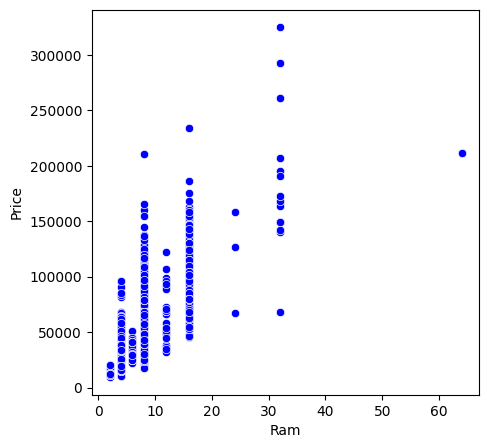

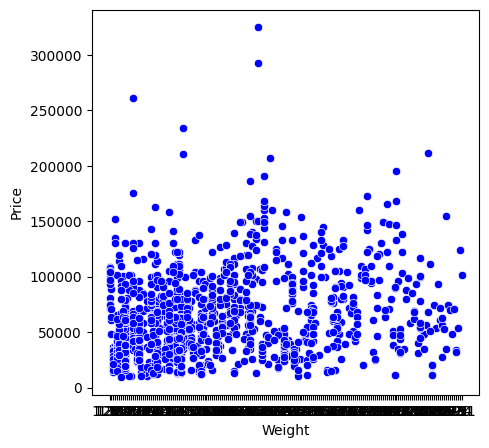

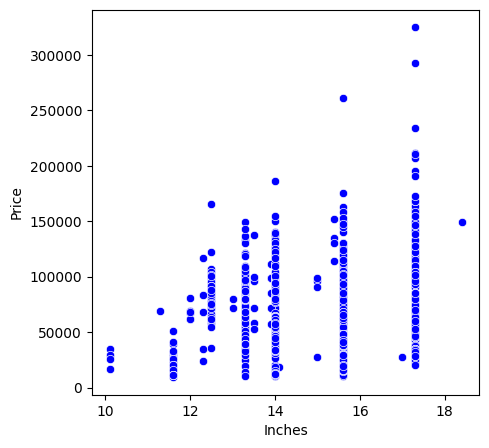

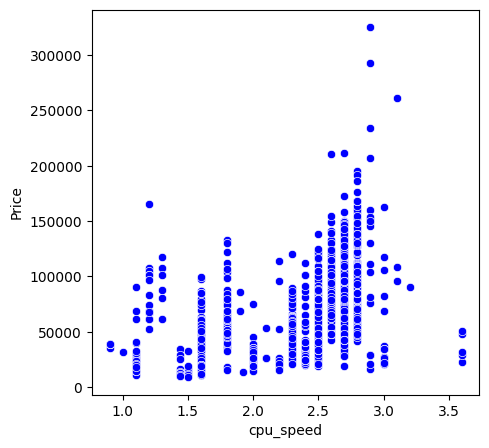

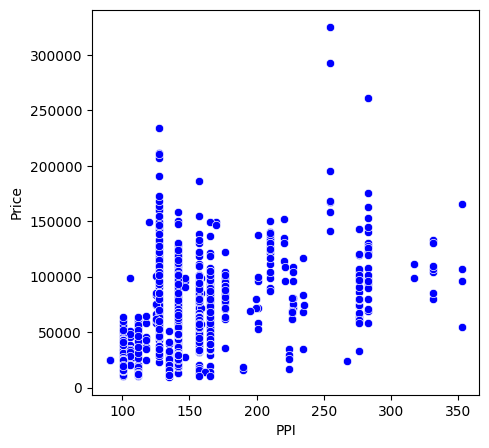

In [125]:
for i in ['Ram','Weight','Inches','cpu_speed','PPI']:
    plt.figure(figsize=(5,5))

    sns.scatterplot(data=df,x=i,y='Price',color='blue')

In [126]:
df=df.drop(columns=['ScreenResolution','X_res','Y_res'],axis=1)

In [127]:
def funcc(x):
    a=x.split(' ')
    return ' '.join(a[0:3])
df['Cpu-name']=df['Cpu'].apply(funcc)

In [128]:
def funcc1(x):
    if x=='Intel Core i7' or x=='Intel Core i5' or x=='Intel Core i3':
        return x
    elif x.split(' ')[0]=='Intel':
        return 'other intel processor'
    else:
        return 'AMD processor'
df['awsq']=df['Cpu-name'].apply(funcc1)



In [129]:
df=df.drop(columns=['Cpu-name'],axis=1)


In [130]:
df=df.rename(columns={'awsq':'Cpu-name'})

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'other intel processor')])

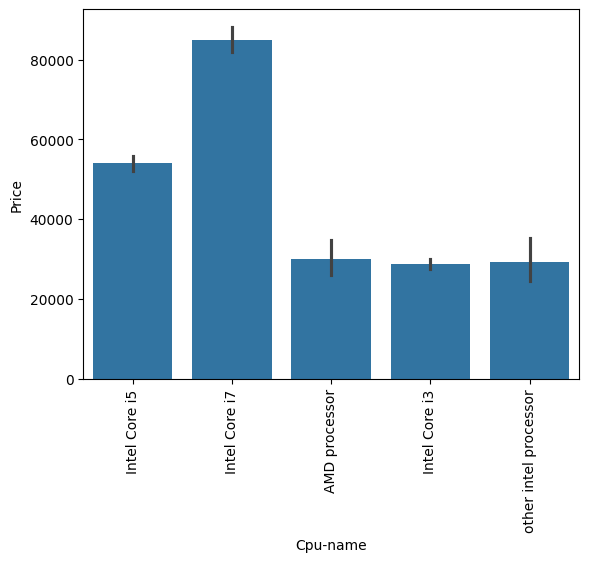

In [131]:
sns.barplot(data=df,x='Cpu-name',y='Price')
plt.xticks(rotation='vertical')

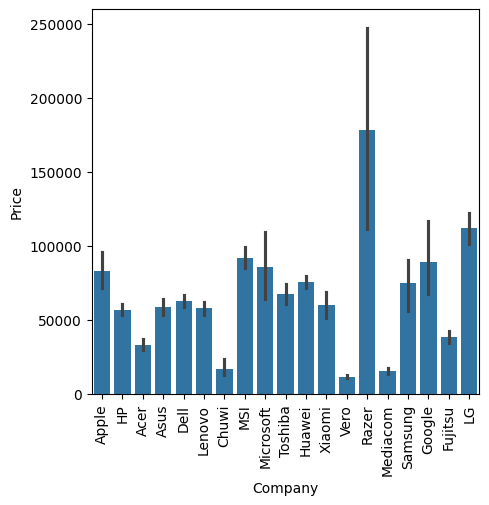

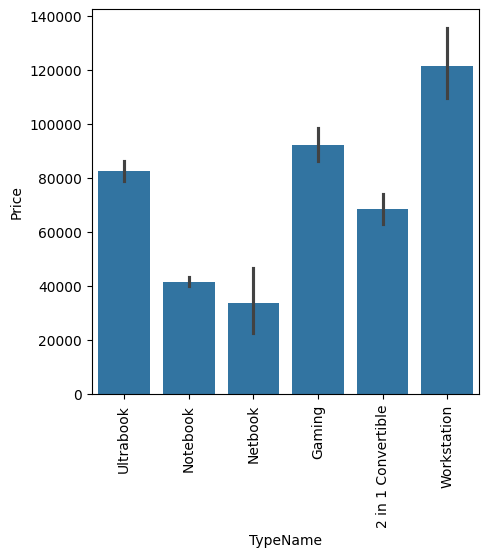

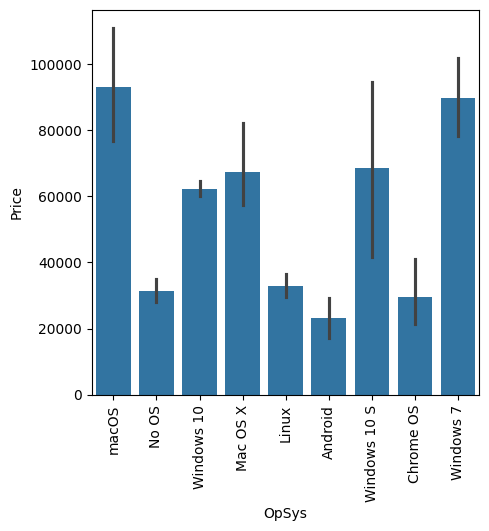

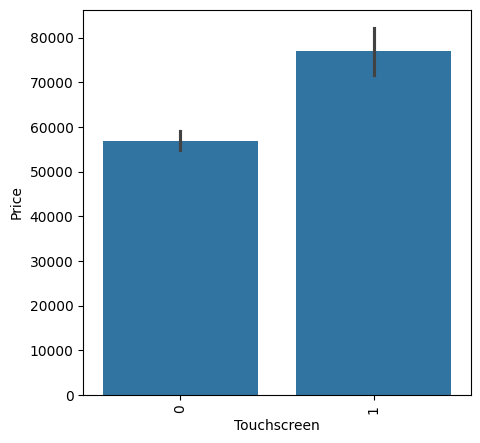

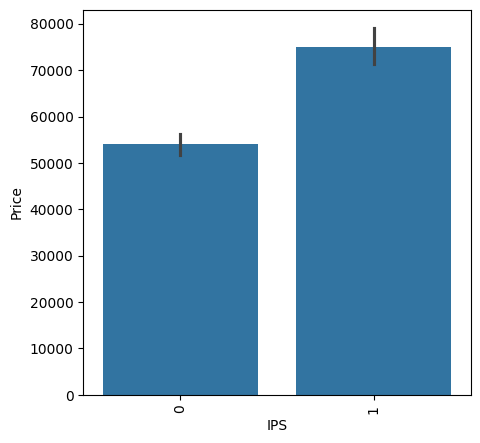

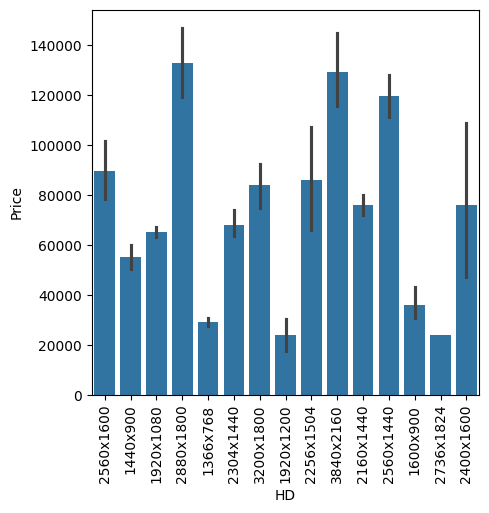

In [133]:
for i in ['Company','TypeName','OpSys','Touchscreen','IPS','HD']:
    plt.figure(figsize=(5,5))

    sns.barplot(data=df,x=i,y='Price')
    plt.xticks(rotation='vertical')

In [135]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [136]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]
df['second']
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.extract('(\d+)')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.extract('(\d+)')

df["first"] = df["first"].astype('int')
df["second"] = df["second"].astype('int')

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:16: SyntaxWarning: invalid escape sequence '\d'
<>:25: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:16: SyntaxWarning: invalid escape sequence '\d'
<>:25: SyntaxWarning: invalid escape sequence '\d'
C:\Users\nehas\AppData\Local\Temp\ipykernel_13524\3815952651.py:1: SyntaxWarning: invalid escape sequence '\.'
  df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
C:\Users\nehas\AppData\Local\Temp\ipykernel_13524\3815952651.py:16: SyntaxWarning: invalid escape sequence '\d'
  df['first'] = df['first'].str.extract('(\d+)')
C:\Users\nehas\AppData\Local\Temp\ipykernel_13524\3815952651.py:25: SyntaxWarning: invalid escape sequence '\d'
  df['second'] = df['second'].str.extract('(\d+)')
C:\Users\nehas\AppData\Local\Temp\ipykernel_13524\3815952651.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplac

In [137]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,...,cpu_speed,mem,Touchscreen,IPS,PPI,Cpu-name,HDD,SSD,Hybrid,Flash_Storage
1064,MSI,Gaming,15.6,Intel Core i7 6700HQ 2.6GHz,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1060,Windows 10,1.8,102777.12,...,2.6,256GB,0,0,141.211998,Intel Core i7,1000,256,0,0


<Axes: xlabel='SSD', ylabel='Price'>

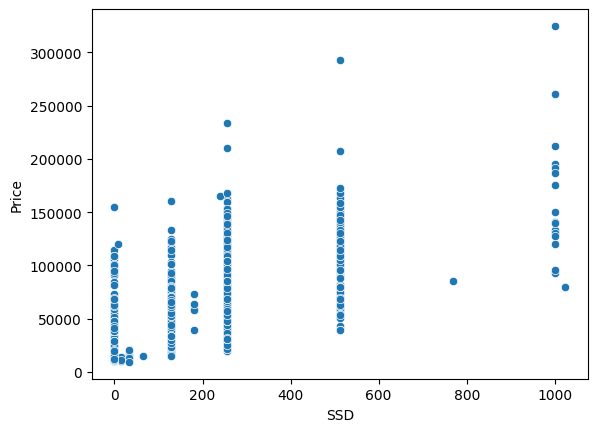

In [138]:
sns.scatterplot(data=df,x='SSD',y='Price')

In [139]:
def gpu(x):
    if 'Intel' in x:
        return 'Intel'
    elif 'Nvidia' in x:
        return 'Nvidia'
    elif 'AMD' in x:
        return 'AMD'
    

In [140]:
df['gpu-name']=df['Gpu'].apply(gpu)

In [141]:
df.sample(5)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,...,mem,Touchscreen,IPS,PPI,Cpu-name,HDD,SSD,Hybrid,Flash_Storage,gpu-name
1140,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6600U 2.6GHz,16,512 SSD,Intel HD Graphics 520,Windows 10,2.8,130003.20,...,512GB,1,1,209.800683,Intel Core i7,0,512,0,0,Intel
454,Dell,Notebook,15.6,Intel Core i7 8550U 1.8GHz,8,128 SSD + 1000 HDD,AMD Radeon 530,Windows 10,2.36,52161.12,...,128GB,0,0,141.211998,Intel Core i7,1000,128,0,0,AMD
1271,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512 SSD,Intel HD Graphics 520,Windows 10,1.3,79866.72,...,512GB,1,1,276.053530,Intel Core i7,0,512,0,0,Intel
807,HP,Notebook,15.6,AMD A12-Series 9700P 2.5GHz,8,2000 HDD,AMD Radeon R7 Graphics,Windows 10,2.04,33513.12,...,2TB,0,0,100.454670,AMD processor,2000,0,0,0,AMD
1246,Dell,Notebook,14.0,Intel Core i5 7200U 2.5GHz,4,500 HDD,Intel HD Graphics 620,Windows 10,1.6,46620.00,...,500GB,0,0,111.935204,Intel Core i5,500,0,0,0,Intel


In [142]:
df=df[(df['gpu-name']!='ARM')]

In [143]:
df['gpu-name'].value_counts()

gpu-name
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

<Axes: xlabel='gpu-name', ylabel='Price'>

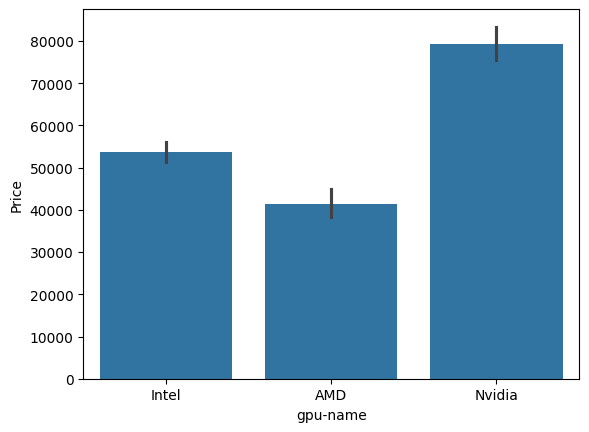

In [144]:
sns.barplot(data=df,x='gpu-name',y='Price')

<Axes: ylabel='Density'>

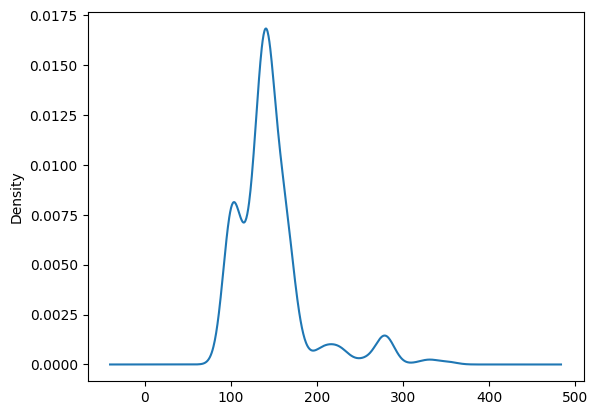

In [145]:
df['PPI'].plot(kind='kde')	

In [146]:
def cat(x):
    if x=='Windows 10' or x=='Windows 10 S' or x=='Windows 7':
        return 'Windows'
    elif x=='macOS' or x=='Mac OS X':
        return 'Macos'
    else:
        return 'Other'
df['Op-sys']=df['OpSys'].apply(cat)

In [147]:
df=df.drop(columns=['OpSys'],axis=1)

<Axes: xlabel='Op-sys', ylabel='Price'>

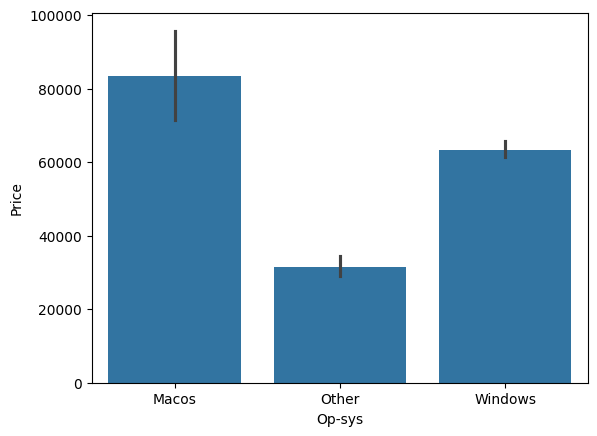

In [148]:
sns.barplot(data=df,x='Op-sys',y='Price')

<Axes: >

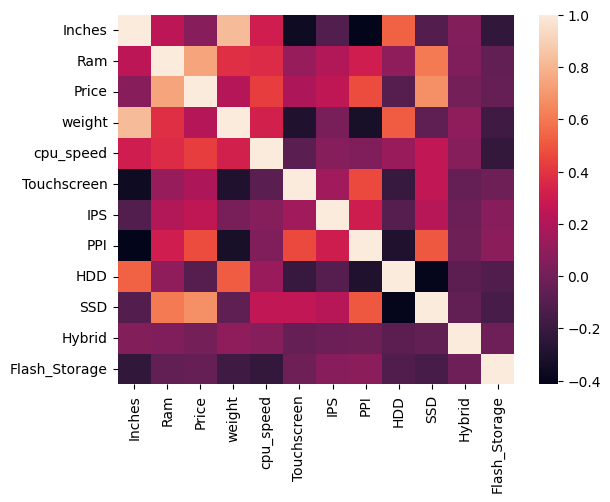

In [149]:
df_numeric = df.select_dtypes(include=['number'])  # Select only numeric columns
sns.heatmap(df_numeric.corr())

In [150]:
q1=df['PPI'].quantile(0.25)
q3=df['PPI'].quantile(0.75)
iqr=q3-q1

lb=q1-1.5*iqr
hb=q3+1.5*iqr
print(lb,hb)

df['PPI']=np.where(df['PPI']<lb,lb,np.where(df['PPI']>hb,hb,df['PPI']))
df

82.3134182049744 202.37276851499232


,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,Weight,Price,HD,...,Touchscreen,IPS,PPI,Cpu-name,HDD,SSD,Hybrid,Flash_Storage,gpu-name,Op-sys
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,1.37,71378.6832,2560x1600,...,0,1,202.372769,Intel Core i5,0,128,0,0,Intel,Macos
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,1.34,47895.5232,1440x900,...,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,Macos
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,1.86,30636.0000,1920x1080,...,0,0,141.211998,Intel Core i5,0,256,0,0,Intel,Other
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,1.83,135195.3360,2880x1800,...,0,1,202.372769,Intel Core i7,0,512,0,0,AMD,Macos
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,1.37,96095.8080,2560x1600,...,0,1,202.372769,Intel Core i5,0,256,0,0,Intel,Macos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128 SSD,Intel HD Graphics 520,1.8,33992.6400,1920x1080,...,1,1,157.350512,Intel Core i7,0,128,0,0,Intel,Windows
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512 SSD,Intel HD Graphics 520,1.3,79866.7200,3200x1800,...,1,1,202.372769,Intel Core i7,0,512,0,0,Intel,Windows
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64 Flash Storage,Intel HD Graphics,1.5,12201.1200,1366x768,...,0,0,111.935204,other intel processor,0,0,0,64,Intel,Windows
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,1000 HDD,AMD Radeon R5 M330,2.19,40705.9200,1366x768,...,0,0,100.454670,Intel Core i7,1000,0,0,0,AMD,Windows


<Axes: >

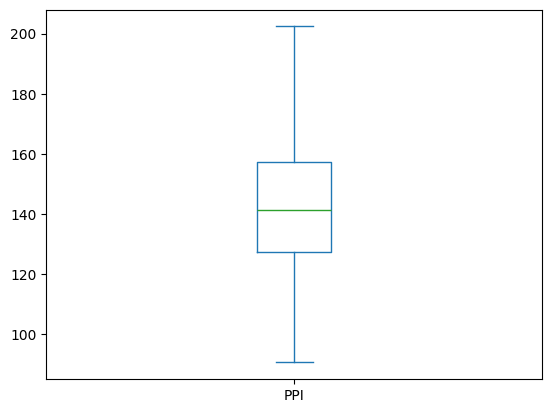

In [151]:
df['PPI'].plot(kind='box')

In [152]:
df=df.drop(columns=['cpu_speed','weight','Inches','HD','Cpu','Gpu','Hybrid','Flash_Storage','Memory','mem'],axis=1)

In [153]:
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,Cpu-name,HDD,SSD,gpu-name,Op-sys
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,202.372769,Intel Core i5,0,128,Intel,Macos
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Macos
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Other
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,202.372769,Intel Core i7,0,512,AMD,Macos
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,202.372769,Intel Core i5,0,256,Intel,Macos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.8,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.3,79866.7200,1,1,202.372769,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.5,12201.1200,0,0,111.935204,other intel processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [154]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen', 'IPS',
       'PPI', 'Cpu-name', 'HDD', 'SSD', 'gpu-name', 'Op-sys'],
      dtype='object')

In [155]:
df=df.rename(columns={'gpu-name':'Gpu-name'})

<Axes: ylabel='Density'>

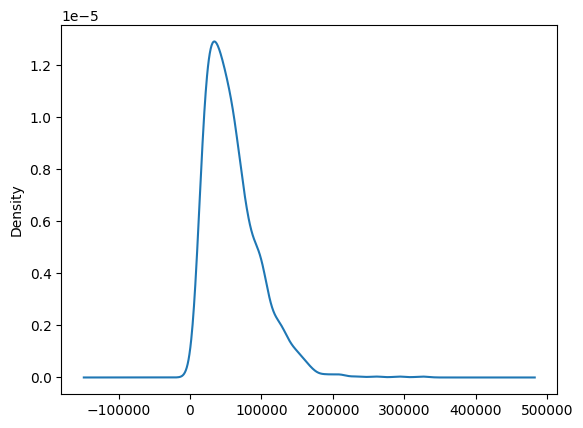

In [156]:
df['Price'].plot(kind='kde')

C:\Users\nehas\AppData\Local\Temp\ipykernel_13524\3556049916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

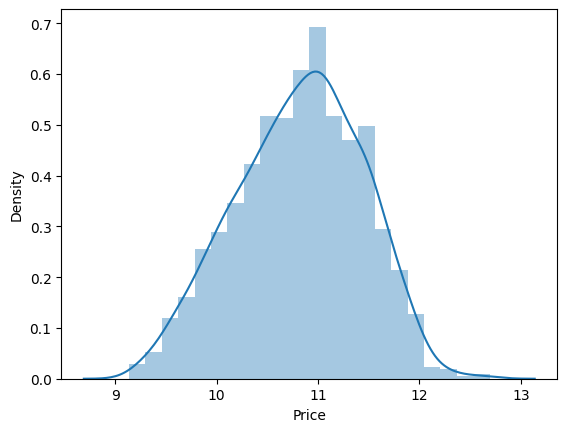

In [157]:
sns.distplot(np.log(df['Price']))

In [158]:
x=df.drop(columns=['Price'],axis=1)
y=np.log(df['Price'])
x

,Company,TypeName,Ram,Weight,Touchscreen,IPS,PPI,Cpu-name,HDD,SSD,Gpu-name,Op-sys
0,Apple,Ultrabook,8,1.37,0,1,202.372769,Intel Core i5,0,128,Intel,Macos
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Macos
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Other
3,Apple,Ultrabook,16,1.83,0,1,202.372769,Intel Core i7,0,512,AMD,Macos
4,Apple,Ultrabook,8,1.37,0,1,202.372769,Intel Core i5,0,256,Intel,Macos
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.8,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.3,1,1,202.372769,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.5,0,0,111.935204,other intel processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [159]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error

In [160]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
x_train

,Company,TypeName,Ram,Weight,Touchscreen,IPS,PPI,Cpu-name,HDD,SSD,Gpu-name,Op-sys
91,Acer,Notebook,8,2.2,0,0,141.211998,Intel Core i7,1000,0,Nvidia,Windows
940,HP,Gaming,8,2.75,0,1,127.335675,Intel Core i5,1000,128,Nvidia,Windows
1026,HP,Notebook,4,2.31,0,0,111.935204,Intel Core i5,500,0,Intel,Windows
1257,Dell,Notebook,4,2.29,0,0,100.454670,Intel Core i3,500,0,Intel,Windows
487,Dell,Notebook,16,2.06,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.2,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.2,0,0,100.454670,AMD processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.2,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Other


In [161]:
from sklearn.ensemble import RandomForestRegressor  
from sklearn.ensemble import VotingRegressor
trf1=ColumnTransformer(transformers=[('trf1',OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False),[0,1,7,10,11])],
                      remainder='passthrough')
trf2=StandardScaler()
trf3=RandomForestRegressor( random_state=42,max_samples=None,max_features=0.1,max_depth=15,bootstrap=False)

pipe1=Pipeline([('p1',trf1),
              ('p2',trf2),
              ('p3',trf3)])
pipe1.fit(x_train,y_train)
y_pred2=pipe1.predict(x_test)
print(r2_score(y_test,y_pred2))
print(mean_absolute_error(y_test,y_pred2))

0.9001746113651048
0.14548933492280178


In [162]:
import pickle
with open('pipe1.pkl','wb') as file:
    pickle.dump(pipe1,file)

In [164]:
with open('df.pkl','wb') as file:
    pickle.dump(df,file)